# COVID-19 PROJECT

Importing All The Libraries Needed

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading Dataset

In [20]:
df = pd.read_csv(f"Dataset/Covid-19/csse_covid_19_daily_reports/12-14-2020.csv")

**QNO 1** : Write a Python program to display the first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values.

In [54]:
# filled the missing values of Deaths Confirmed and other Columns with thier column's mean
# and turning any negative value to positive
for i in range(7,11):
    df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mean()).astype(int)
    df[df.columns[i]] = df[df.columns[i]].abs()
df.Last_Update = pd.to_datetime(df.Last_Update)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FIPS                 3263 non-null   float64       
 1   Admin2               3268 non-null   object        
 2   Province_State       3806 non-null   object        
 3   Country_Region       3976 non-null   object        
 4   Last_Update          3976 non-null   datetime64[ns]
 5   Lat                  3890 non-null   float64       
 6   Long_                3890 non-null   float64       
 7   Confirmed            3976 non-null   int32         
 8   Deaths               3976 non-null   int32         
 9   Recovered            3976 non-null   int32         
 10  Active               3976 non-null   int32         
 11  Combined_Key         3976 non-null   object        
 12  Incident_Rate        3890 non-null   float64       
 13  Case_Fatality_Ratio  3934 non-nul

In [55]:
#first five rows of the dataset
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-12-15 05:26:38,33.93911,67.709953,48718,1969,38252,8497,Afghanistan,125.147897,4.041627
1,NaN,NaN,NaN,Albania,2020-12-15 05:26:38,41.15330,20.168300,49191,1016,24820,23355,Albania,1709.326569,2.065418
2,NaN,NaN,NaN,Algeria,2020-12-15 05:26:38,28.03390,1.659600,92597,2609,60888,29100,Algeria,211.162594,2.817586
3,NaN,NaN,NaN,Andorra,2020-12-15 05:26:38,42.50630,1.521800,7382,79,6706,597,Andorra,9554.131884,1.070171
4,NaN,NaN,NaN,Angola,2020-12-15 05:26:38,-11.20270,17.873900,16277,372,8924,6981,Angola,49.524941,2.285433


**QNO 2** : Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.

In [56]:
lst = []
for i in df['Country_Region'].unique():
    data = []
    data.append(i)
    for j in range(7,11):
        data.append(df[df.columns[j]][(df['Last_Update'] == max(df['Last_Update'])) & (df['Country_Region'] == i)].sum())
    lst.append(data)
pd.DataFrame(lst,columns=["Country","Confirmed","Deaths","Recovered","Active"])

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,48718,1969,38252,8497
1,Albania,49191,1016,24820,23355
2,Algeria,92597,2609,60888,29100
3,Andorra,7382,79,6706,597
4,Angola,16277,372,8924,6981
...,...,...,...,...,...
186,Vietnam,1402,35,1246,121
187,West Bank and Gaza,111102,1000,87057,23045
188,Yemen,2084,606,1384,94
189,Zambia,18322,367,17409,546


**QNO 3** : Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.

In [57]:
lst = []
for i in df['Country_Region'].unique():
    for j in df[df['Country_Region'] == i].Province_State.unique():
        data = []
        data.append(i)
        data.append(j)
        for k in range(7,10):
            data.append(df[df.columns[k]][(df['Last_Update'] == max(df['Last_Update'])) & (df['Country_Region'] == i) & (df['Province_State'] == j)].sum())
        lst.append(data)
pd.DataFrame(lst,columns=["Country","Province","Confirmed","Deaths","Recovered"])

,Country,Province,Confirmed,Deaths,Recovered
0,Afghanistan,NaN,0,0,0
1,Albania,NaN,0,0,0
2,Algeria,NaN,0,0,0
3,Andorra,NaN,0,0,0
4,Angola,NaN,0,0,0
...,...,...,...,...,...
755,Vietnam,NaN,0,0,0
756,West Bank and Gaza,NaN,0,0,0
757,Yemen,NaN,0,0,0
758,Zambia,NaN,0,0,0


**QNO 4** : Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19). 

In [58]:
lst = []
for i in df[df['Country_Region'] == 'China'].Province_State.unique():
    data = []
    data.append(i)
    for j in range(7,10):
        data.append(df[df.columns[j]][(df['Last_Update'] == max(df['Last_Update'])) & (df['Country_Region'] == 'China') & (df['Province_State'] == i)].sum())
    lst.append(data)
pd.DataFrame(lst,columns=["Province","Confirmed","Deaths","Recovered"])

,Province,Confirmed,Deaths,Recovered
0,Anhui,992,6,986
1,Beijing,956,9,940
2,Chongqing,590,6,583
3,Fujian,502,1,469
4,Gansu,182,2,180
5,Guangdong,2018,8,1973
6,Guangxi,264,2,261
7,Guizhou,147,2,145
8,Hainan,171,6,165
9,Hebei,373,6,367


**QNO 5** : Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19).

In [62]:
lst = []
for i in df['Country_Region'].unique():
    data = []
    data.append(i)
    data.append(df.Deaths[(df['Last_Update'] == max(df['Last_Update'])) & (df['Country_Region'] == i)].sum())
    lst.append(data)
pd.DataFrame(lst,columns=["Country","Deaths"])

,Country,Deaths
0,Afghanistan,1969
1,Albania,1016
2,Algeria,2609
3,Andorra,79
4,Angola,372
...,...,...
186,Vietnam,35
187,West Bank and Gaza,1000
188,Yemen,606
189,Zambia,367


**QNO 6** : Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered.

In [63]:
lst = []
for i in df['Country_Region'].unique():
    if df['Recovered'][(df['Country_Region'] == i)].sum() == 0:
        lst.append(i)
pd.DataFrame(lst,columns=["Country"])

,Country
0,Belgium
1,Serbia
2,Sweden


**QNO 7** :  Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died.

In [64]:
lst = []
for i in df['Country_Region'].unique():
    data = []
    data.append(i)
    data.append(df['Deaths'][(df['Country_Region'] == i)].sum())
    lst.append(data)
pd.DataFrame(lst,columns=["Country","Deaths"])

,Country,Deaths
0,Afghanistan,1969
1,Albania,1016
2,Algeria,2609
3,Andorra,79
4,Angola,372
...,...,...
186,Vietnam,35
187,West Bank and Gaza,1000
188,Yemen,606
189,Zambia,367


**QNO 7** :Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered. 

In [12]:
lst = []
for i in df['Country_Region'].unique():
    data = []
    data.append(i)
    data.append(df['Recovered'][(df['Country_Region'] == i)].sum())
    lst.append(data)
pd.DataFrame(lst,columns=["Country","Recovered"])

,Country,Recovered
0,Afghanistan,38200
1,Albania,24520
2,Algeria,60028
3,Andorra,6629
4,Angola,8841
...,...,...
186,Vietnam,1238
187,West Bank and Gaza,83123
188,Yemen,1383
189,Zambia,17339


**QNO 8** :Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [66]:
lst = []
for i in df['Country_Region'].unique():
    data = []
    data.append(max(df['Last_Update'][df['Country_Region'] == i]))
    data.append(i)
    for j in range(7,11):
        data.append(df[df.columns[j]][(df['Country_Region'] == i)].sum())
    lst.append(data)
pd.DataFrame(lst,columns=["Last Update","Country","Confirmed","Deaths","Recovered","Active"]).head(10)

,Last Update,Country,Confirmed,Deaths,Recovered,Active
0,2020-12-15 05:26:38,Afghanistan,48718,1969,38252,8497
1,2020-12-15 05:26:38,Albania,49191,1016,24820,23355
2,2020-12-15 05:26:38,Algeria,92597,2609,60888,29100
3,2020-12-15 05:26:38,Andorra,7382,79,6706,597
4,2020-12-15 05:26:38,Angola,16277,372,8924,6981
5,2020-12-15 05:26:38,Antigua and Barbuda,148,5,138,5
6,2020-12-15 05:26:38,Argentina,1503222,41041,1340120,122061
7,2020-12-15 05:26:38,Armenia,148682,2503,125966,20213
8,2020-12-15 05:26:38,Australia,28048,908,25689,1451
9,2020-12-15 05:26:38,Austria,325051,4530,284174,36347


**QNO 9** :Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.

In [73]:
lst = []
for i in df['Country_Region'].unique():
    data = []
    if df['Deaths'][(df['Country_Region'] == i)].sum() > 150:
        data.append(i)
        for j in range(7,11):
            data.append(df[df.columns[j]][(df['Last_Update'] == max(df['Last_Update'])) & (df['Country_Region'] == i)].sum())
        lst.append(data)
data = pd.DataFrame(lst,columns=["Country","Confirmed","Deaths","Recovered","Active"])

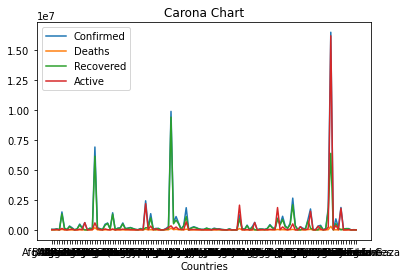

In [74]:
plt.plot(data.Country, data.Confirmed)
plt.plot(data.Country, data.Deaths)
plt.plot(data.Country, data.Recovered)
plt.plot(data.Country, data.Active)
plt.legend(["Confirmed", "Deaths", "Recovered", "Active"])
plt.xlabel("Countries")
plt.title("Carona Chart")
plt.grid(True)
plt.show()

**QNO 10** :Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA

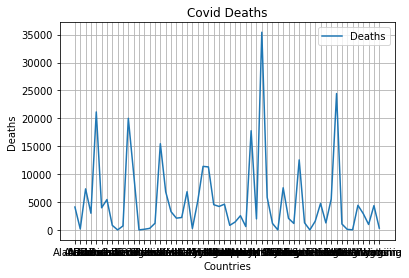

In [76]:
data = [[],[]]
for i in df[df.Country_Region == 'US'].Province_State.unique():
    data[0].append(i)
    data[1].append(df.Deaths[df.Province_State == i].sum())
plt.plot(data[0], data[1])
plt.legend(["Deaths"])
plt.xlabel("Countries")
plt.ylabel("Deaths")
plt.title("Covid Deaths")
plt.grid(True)
plt.show()

**QNO 11** :Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA

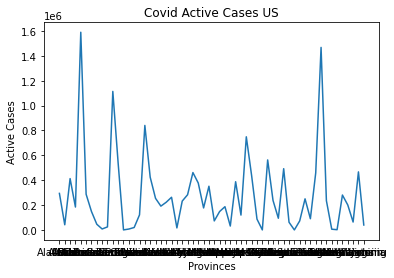

In [78]:
data = [[],[]]
for i in df[df.Country_Region == 'US'].Province_State.unique():
    data[0].append(i)
    data[1].append(df.Active[df.Province_State == i].sum())
plt.plot(data[0], data[1])
plt.xlabel("Provinces")
plt.ylabel("Active Cases")
plt.title("Covid Active Cases US")
plt.grid(True)
plt.show()

**QNO 12** :Write a Python program to visualize the state/province wise combined number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in Pakistan.

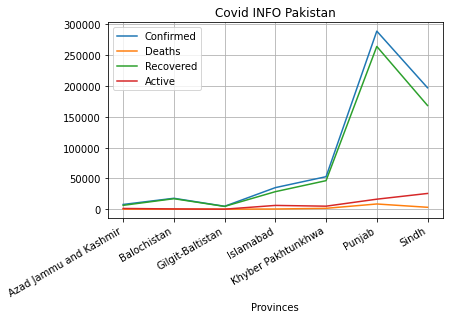

In [81]:
data = [[],[],[],[],[]]
for i in df[df.Country_Region == 'Pakistan'].Province_State.unique():
    data[0].append(i)
    data[1].append(df.Confirmed[df.Province_State == i].sum())
    data[2].append(df.Deaths[df.Province_State == i].sum())
    data[3].append(df.Recovered[df.Province_State == i].sum())
    data[4].append(df.Active[df.Province_State == i].sum())
plt.plot(data[0], data[1])
plt.plot(data[0], data[2])
plt.plot(data[0], data[3])
plt.plot(data[0], data[4])
plt.gcf().autofmt_xdate()
plt.xlabel("Provinces")
plt.title("Covid INFO Pakistan")
plt.legend(["Confirmed", "Deaths", "Recovered", "Active"])
plt.grid(True)
plt.show()

**QNO 13** :Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time.

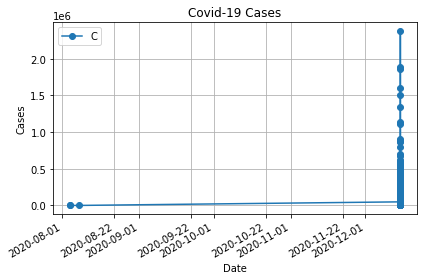

In [82]:
df.Last_Update = pd.to_datetime(df.Last_Update)
df.sort_values('Last_Update', inplace=True)
plt.plot_date(df.Last_Update, df.Confirmed, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Covid-19 Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend("Confirmed Cases")
plt.tight_layout()
plt.grid(True)
plt.show()